In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hddm

/Library/Python/2.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
data = hddm.load_csv('TD_data_full_withbetas.csv')

In [3]:
print data[data['Condition'] == 'simple'].rt.mean()
print data[data['Condition'] == 'complex'].rt.mean()

2.18749370277
2.6663547486


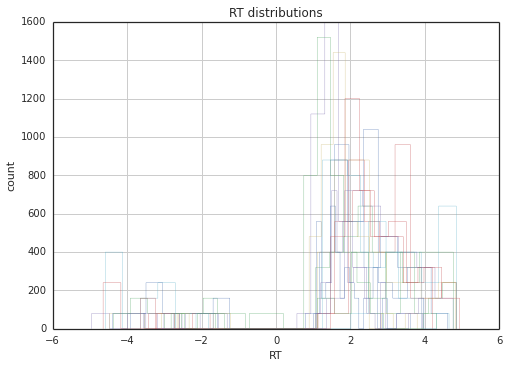

In [4]:
sns.set_style('white')
data = hddm.utils.flip_errors(data) #error RTs are flipped to be negative
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20,histtype='step', ax=ax)

In [5]:
roi = '01-6mm_L_LOC_FG_Biol_Psych_-46_-72_-18_roi'

FG_data = data[data['roi'] == roi]
FG_model = hddm.models.HDDMRegressor(data, 'a ~ beta:C(Condition)')

Adding these covariates:
['a_Intercept', 'a_beta:C(Condition)[complex]', 'a_beta:C(Condition)[simple]']


In [6]:
FG_model.sample(5000, burn=200)

 [-----------------100%-----------------] 5001 of 5000 complete in 10212.6 sec

## The effect of FG is to increase the estimated decision threshold for complex trials: The effect is positive and 99% greater than 0. On simple trials, FG decreases the estimated decision threshold.

P(a_beta < 0) =  0.000416666666667


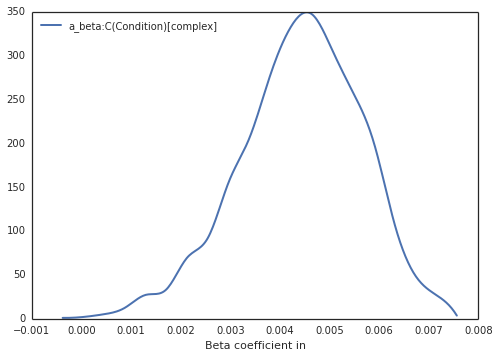

In [7]:
beta = FG_model.nodes_db.node["a_beta:C(Condition)[complex]"]
hddm.analyze.plot_posterior_nodes([beta], bins=20)
plt.xlabel('Beta coefficient in ')
print "P(a_beta < 0) = ", (beta.trace() < 0).mean()

P(a_beta > 0) =  0.0


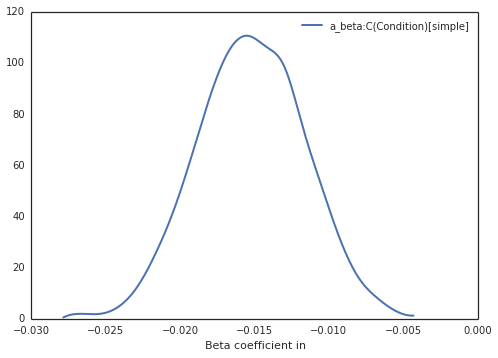

In [9]:
beta = FG_model.nodes_db.node["a_beta:C(Condition)[simple]"]
hddm.analyze.plot_posterior_nodes([beta], bins=20)
plt.xlabel('Beta coefficient in ')
print "P(a_beta > 0) = ", (beta.trace() > 0).mean()